# Tree Parser and Tree Match

### pyStatParser (Tree Parser library)

Simple Python statistical (CKY) parser together with scripts for learning the PCFG from the QuestionBank and Penn treebanks.

#### pyStatParser Installation

 1. Download pyStatParser directory from github repository --> link.https://github.com/emilmont/pyStatParser
 2. Use Setup.py to the install the Package. --> Command: "python setup.py install"
 

# Import Library

In [1]:
from semantic_code import classes
Conceptobj = classes.ConceptNet_graph()
ex = classes.execution(Conceptobj)

In [2]:
Conceptobj.get_relation_path('apple','orange')

[['apple', 'fruit', 'orange']]

# Test Cases

In [3]:
# sent1 = "I ate an apple in new_york" 
# sent2 = "I ate an orange in new_jersey" 
# sent1 = "I ate an apple under the bridge" 
# sent2 = "I ate an orange" 
# sent1 = "I am from harvard" 
# sent2 = "I am from new_jersey" 
# sent1 = "I eat ripe apples" ######
# sent2 = "I eat spoiled oranges" ######
# sent1 = "I eat apples and oranges"  
# sent2 = "I eat apples but not oranges" 
# sent1 = "I ate an apple under the bridge" 
# sent2 = "I ate an orange by the building"
sent1 = "I ate an apple under the bridge at midnight" 
sent2 = "I ate an tomato at noon"
# sent1 = "I eat ripe apples" 
# sent2 = "I eat an apple"
# sent1 = "He said the foodservice pie business does not fit our long-term growth strategy"
# sent2 = "The foodservice pie business does not fit the company long-term growth strategy"
# sent1 = "The broader Standard & Poor 's 500 Index .SPX gave up 11.91 points , or 1.19 percent , at 986.60"
# sent2 = "The technology-laced Nasdaq Composite Index was down 25.36 points , or 1.53 percent , at 1,628.26"
# sent1 = "I am from new_york" 
# sent2 = "I eat apples"
# sent1 = 'You need to read a lot to know what you like and what you do not'
# sent2 = 'You should tell a good story and sometimes you have to tweak reality to do so'
# sent1 = 'I did this one time as well'
# sent2 = 'I have this habit as well'
# sent1 = 'In the US it will depend on the school'
# sent2 = 'It really depends on the school and the program'
# sent1 = 'You do not need to worry'
# sent2 = 'You do not have to worry'
# sent1 = 'The problem likely will mean corrective changes before the shuttle fleet starts flying again'
# sent2 = 'He said the problem needs to be corrected before the space shuttle fleet is cleared to fly again'
# sent1 = 'Bremer said one initiative is to launch a US$70 million nationwide program in the next two weeks to clean up neighborhoods and build community projects'
# sent2 = 'Bremer said he would launch a $70-million program in the next two weeks to clean up neighborhoods across Iraq and build community projects, but gave no details'

# Show original tree

In [4]:
classes.parser.parse(sent1.lower()).pretty_print()
classes.parser.parse(sent2.lower()).pretty_print()

                         RRC                                 
  ________________________|____                               
 |    |                        NP                            
 |    |                    ____|__________________            
 |    |                   NP                      |          
 |    |         __________|____                   |           
 |    |        |               PP                 PP         
 |    |        |           ____|___            ___|_____      
ADJP ADJP      NP         |        NP         |         NP   
 |    |     ___|____      |     ___|____      |         |     
 JJ   JJ   DT       NN    IN   DT       NN    IN        NN   
 |    |    |        |     |    |        |     |         |     
 i   ate   an     apple under the     bridge  at     midnight

          RRC                            
  _________|______________                
 |    |                   NP             
 |    |         __________|_______        
 |    |        | 

# Process the Sentences

apple tomato NN NN
apple tomato
Both PP ['midnight', 'under', 'the', 'bridge'] ['noon']
['midnight', 'under', 'the', 'bridge'] ['noon'] ['NN', 'IN', 'DT', 'NN'] ['NN']
midnight noon NN NN
midnight noon
bridge noon NN NN
bridge noon


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [03:12<00:00, 70.51s/it]
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


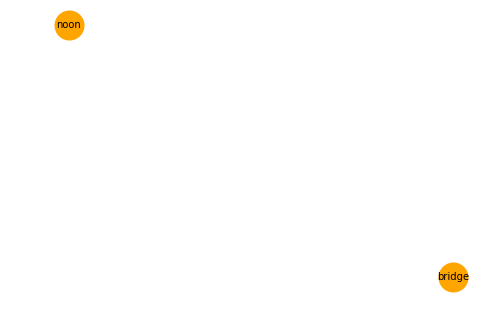

<Figure size 18000x18000 with 0 Axes>

NN NN reached


In [5]:
parse_sent1,parse_sent2,word,realtion,word_tag = ex.calculate_intersection_differance(sent1,sent2)

# Show Tree Differances

In [6]:
ex.get_tree_differance(word, realtion,word_tag)

('apple', 'tomato') // ['NN', 'NN'] // ['IsA_fruit', 'RelatedTo_apple', 'RelatedTo_fruit']
('midnight', 'noon') // ['NN', 'NN'] // ['IsA_calendar hour']
('bridge', 'noon') // ['NN', 'NN'] // ['RelatedTo_noon']
('under', 'noon') // ['IN', 'NN'] // ['None']
('the', 'noon') // ['DT', 'NN'] // ['None']


# Show Tree Intersection

In [7]:
ex.get_tree_intersection(parse_sent1,parse_sent2)

          RRC                                            
  _________|_________________                             
 |    |                      NP                          
 |    |         _____________|_______                     
 |    |        NP                    PP                  
 |    |        |                  ___|__________          
ADJP ADJP      NP                |              NP       
 |    |     ___|______           |              |         
 JJ   JJ   DT         NN         IN             NN       
 |    |    |          |          |              |         
 i   ate   an     ['fruit']      at     ['calendar_hour']

          RRC                                            
  _________|_________________                             
 |    |                      NP                          
 |    |         _____________|_______                     
 |    |        |                     PP                  
 |    |        |                  ___|__________          
ADJP 